# HDS 5210-2022 Programming for Health Data Scientists - Final Project

## Part - 1: Introduction ##

I have choose to use NHANES questionnaire data from two years with 5 years apart i.e. data from 2007-2008 and 2013-2014 to observe the if the no of suicidal thoughts have increased or decreased. The data formats used here are .xpt and .csv. The nhanes 2007-2008 data is broken into two sas format files. So, the first step is to read them and merge them to form a single dataframe.

Here's the codebook of the NHANES data which has the exact meaning of each code value in the data: 

Questionnaire data: https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DPQ_H.htm

Demographics data: https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm

** The code book of 2007-2008 also has the same coding.

In [1]:
#Importing and reading the data files
import pandas as pd
import numpy as np
df1 = pd.read_sas('../../hds5210-2022/final/DPQ_E.XPT')
df2 = pd.read_sas('../../hds5210-2022/final/DEMO_E.XPT')

In [2]:
#Checking the data types of columns in the dataframe.
df1['DPQ010'].dtypes

dtype('float64')

In [3]:
df1.shape
#df1 is the questionnaire data

(5995, 11)

In [4]:
df2.shape
#df2 is the demographics data

(10149, 43)

Here we can observe the difference in number of rows in both demographic data and questionnaire data. There is a column named SEQN which says it is a sequence number. Now, we merge the daya and keep only the data with matches our sequence numbers using inner join.


-----------------------------------------------------------------------------------------------------------------------------------------------


## Part-2:  Merging the data to form one single dataframe

In [5]:
#Using inner join to merge the data
df_combined = pd.concat([df2,df1], axis = 'columns', join = 'inner')

In [6]:
df_combined

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,41475.0,5.0,2.0,2.0,2.0,6.200000e+01,751.0,752.0,5.0,2.0,...,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,41476.0,5.0,2.0,1.0,2.0,6.000000e+00,81.0,82.0,5.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
2,41477.0,5.0,2.0,2.0,1.0,7.100000e+01,859.0,860.0,3.0,1.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
3,41478.0,5.0,2.0,2.0,2.0,1.000000e+00,17.0,17.0,3.0,NaN,...,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,41479.0,5.0,2.0,1.0,1.0,5.200000e+01,629.0,630.0,1.0,2.0,...,9.000000e+00,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,47465.0,5.0,1.0,NaN,2.0,8.000000e+01,NaN,NaN,3.0,2.0,...,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79
5991,47466.0,5.0,2.0,2.0,2.0,4.700000e+01,571.0,572.0,1.0,2.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
5992,47467.0,5.0,2.0,1.0,2.0,5.397605e-79,5.0,5.0,1.0,NaN,...,5.397605e-79,5.397605e-79,2.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e+00,2.000000e+00,5.397605e-79,5.397605e-79
5993,47468.0,5.0,2.0,1.0,2.0,9.000000e+00,115.0,117.0,2.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79


Now we got all the columns but only the rows which and same in both the data. So, we have 5995 entries with both questionnaire and demographics data. 


-----------------------------------------------------------------------------------------------------------------------------------------------


### Part-3: Doing some analysis

In [7]:
#Selecting only variables of interest and storing in a new df.

nhanes_07_08  = df_combined.loc[:, ['RIAGENDR', 'RIDRETH1', 'DMDMARTL', 'INDHHIN2', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 
                                    'DPQ050', 'DPQ060', 'DPQ070', 'DPQ090']]

In [8]:
# As the columns are in codes and difficult to understand renaming them to meaningful labels.
nhanes_07_08.rename(columns={'RIAGENDR': 'GENDER', 'RIDRETH1': 'RACE', 'DMDMARTL': 'MARITAL STATUS', 'INDHHIN2': 'ANNUAL INCOME',
                            'DPQ010': 'Little interest in doing things', 'DPQ020': 'Feeling depressed',
                            'DPQ030': 'Sleeping problems', 'DPQ040': 'Feeling tired', 'DPQ050': 'Poor appetite or over eating',
                             'DPQ060': 'Feeling bad about oneself', 'DPQ070': 'Trouble concentrating', 
                             'DPQ090': 'Thought you would be better off dead'}, inplace=True)

In [9]:
nhanes_07_08

,GENDER,RACE,MARITAL STATUS,ANNUAL INCOME,Little interest in doing things,Feeling depressed,Sleeping problems,Feeling tired,Poor appetite or over eating,Feeling bad about oneself,Trouble concentrating,Thought you would be better off dead
0,2.0,5.0,1.0,6.0,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
1,2.0,5.0,NaN,15.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,1.0,3.0,1.0,5.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
3,2.0,3.0,NaN,3.0,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,1.0,1.0,1.0,8.0,9.000000e+00,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...
5990,2.0,3.0,1.0,6.0,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
5991,2.0,1.0,3.0,8.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
5992,2.0,1.0,NaN,99.0,5.397605e-79,5.397605e-79,2.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e+00,5.397605e-79
5993,2.0,2.0,NaN,5.0,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79


-----------------------------------------------------------------------------------------------------------------------------------------------


### Part-4: Bringing in 2013-2014 data

The NHANES 2013-2014 data one single csv file with both demographics and questionnaire data. Now, we read the file bby selecting only the required fileds and store it in a new dataframe.

In [10]:
nhanes_13_14 = pd.read_csv('../../hds5210-2022/final/NHANES_2013-2014.csv', header=0, 
                                usecols=['RIAGENDR', 'RIDRETH1', 'DMDMARTL', 'INDHHIN2', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 
                                    'DPQ050', 'DPQ060', 'DPQ070', 'DPQ090'])

In [11]:
nhanes_13_14

,RIAGENDR,RIDRETH1,DMDMARTL,INDHHIN2,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ090
0,1,4,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,3,1.0,15.0,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0
4,1,1,3.0,9.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5919,1,1,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5920,1,3,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5921,1,1,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5922,1,2,5.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Renaming the columns to have meaningful labels.

nhanes_13_14.rename(columns={'RIAGENDR': 'GENDER', 'RIDRETH1': 'RACE', 'DMDMARTL': 'MARITAL STATUS', 'INDHHIN2': 'ANNUAL INCOME',
                            'DPQ010': 'Little interest in doing things', 'DPQ020': 'Feeling depressed',
                            'DPQ030': 'Sleeping problems', 'DPQ040': 'Feeling tired', 'DPQ050': 'Poor appetite or over eating',
                             'DPQ060': 'Feeling bad about oneself', 'DPQ070': 'Trouble concentrating', 
                             'DPQ090': 'Thought you would be better off dead'}, inplace=True)

In [13]:
assert nhanes_13_14.shape == (5924, 12)
assert set(nhanes_13_14.columns == set(['GENDER', 'RACE', 'MARITAL STATUS', 'ANNUAL INCOME',
       'Little interest in doing things', 'Feeling depressed',
       'Sleeping problems', 'Feeling tired', 'Poor appetite or over eating',
       'Feeling bad about oneself', 'Trouble concentrating',
       'Thought you would be better off dead']))

-----------------------------------------------------------------------------------------------------------------------------------------------


## Part-5: Data Visualization

### Plotting suicidal thoughts variable which is DPQ090

Comparing the data from both the years by plotting graph between DPQ090 variable in both years data.

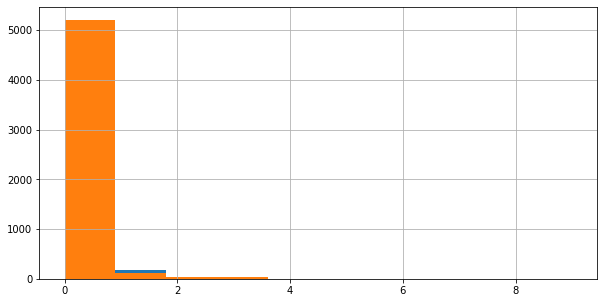

In [14]:
plot1 = nhanes_07_08['Thought you would be better off dead'].hist(figsize=(10, 5))

plot2 = nhanes_13_14['Thought you would be better off dead'].hist(figsize=(10, 5))

We find a slight increase in the number of participants in 2013-2014 data who answered '1' which says they have suicidal thoughts several days. 





### Now we plot the sleeping issue variable which is DPQ030 from both years.

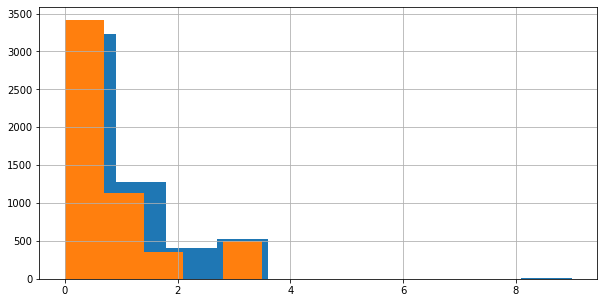

In [15]:
plot1 = nhanes_07_08['Sleeping problems'].hist(figsize=(10, 5))

plot2 = nhanes_13_14['Sleeping problems'].hist(figsize=(10, 5))

We can observe the increase in number of participants with sleeping issues. 

### Plotting a pair plot with all the variables in the dataframes.

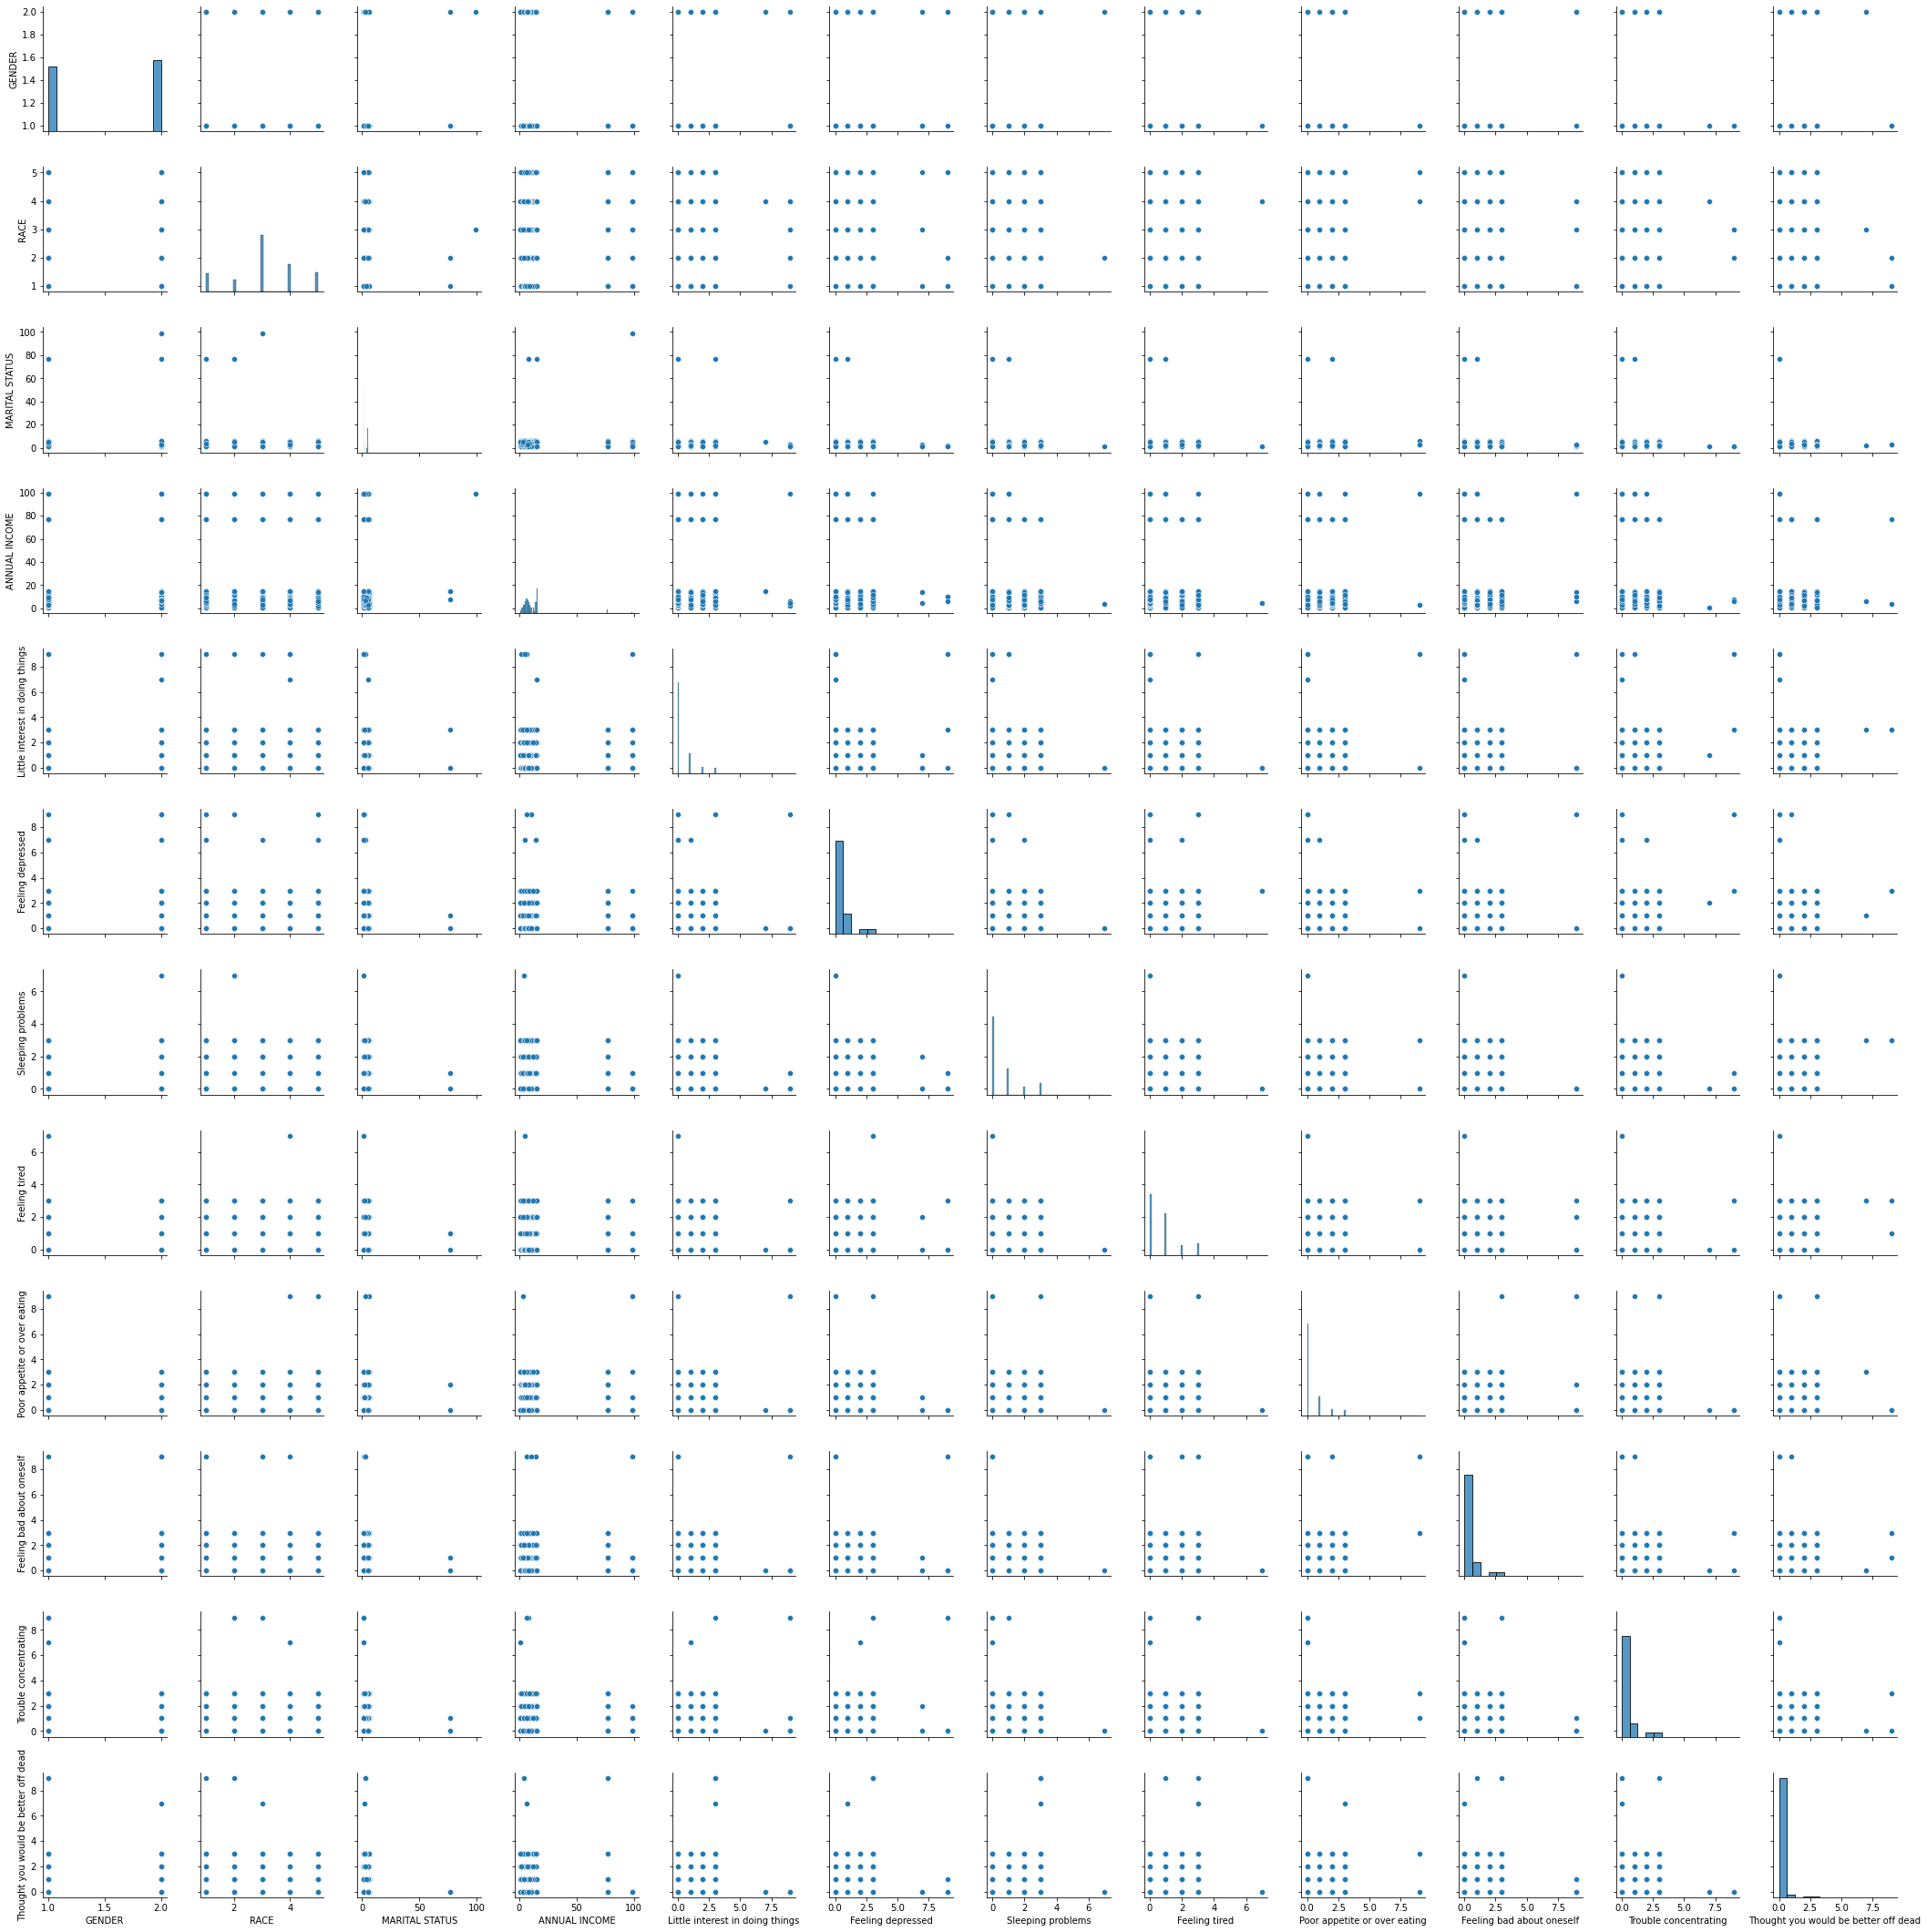

In [16]:
import seaborn as sns

sns.pairplot(nhanes_13_14)

In [ ]:
sns.pairplot(nhanes_07_08)

By comparing both the pairplots we can see that there's no much difference in the data. Only the number seems increased in few variiables.

----------------------------------------------------------------------------------------------------------------------------------------------
## Part-6: Merging

Now we merge both years data as they have same columns and add a extra column which has the information on which year that data is from.

In [ ]:
merged = pd.concat([nhanes_07_08, nhanes_13_14], axis=0, sort=False, keys = ['2007-2008','2013-2014'], 
                   names = ['Year']).reset_index(level='Year')

In [ ]:
assert merged.shape == (11919, 13)

The merged dataframe have some missing values. These values cannot be filled with '0' as it can mislead the conclusions because '0' is a category here. So, we drop the rows with NaN and retain the rows which contain all the data. Also we change the data type from float to int so that we can do some scoring with it later.

In [ ]:
float_col = merged.select_dtypes(include=['float64'])

# This will select float columns only
# list(float_col.columns.values)

merged = merged.dropna()
for col in float_col.columns.values:
    merged[col] = merged[col].astype('int64')

In [ ]:
assert merged['RACE'].dtypes == ('int64')
assert merged.shape == (8174, 13)
assert set(merged.columns == set(['Year', 'GENDER', 'RACE', 'MARITAL STATUS', 'ANNUAL INCOME',
       'Little interest in doing things', 'Feeling depressed',
       'Sleeping problems', 'Feeling tired', 'Poor appetite or over eating',
       'Feeling bad about oneself', 'Trouble concentrating',
       'Thought you would be better off dead']))

-----------------------------------------------------------------------------------------------------------------------------------------------


## Part-7: Grouping and Pivoting

In [ ]:
#Comparing the depression and race together from differnt years.
depression_by_race = merged.groupby(['Year','RACE'])['Thought you would be better off dead'].count().reset_index()

In [ ]:
depression_by_race

In [ ]:
#Using pivot table function to change the table.
depression_by_race.pivot(index='Year', columns='RACE', values='Thought you would be better off dead')

In [ ]:
#Comparing the depression and marital status together from differnt years.
depression_by_mstatus = merged.groupby(['Year','MARITAL STATUS'])['Thought you would be better off dead'].count().reset_index()

In [ ]:
depression_by_mstatus

In [ ]:
#Using pivot table function to change the table.
depression_by_mstatus.pivot(index='Year', columns='MARITAL STATUS', values='Thought you would be better off dead')

-----------------------------------------------------------------------------------------------------------------------------------------------


## Part-8: Mental health Scoring

As each questionnaire data has the range of values from 0 to 3 I have taken them to give scoring to the each question. This gives us a overall score which can be between any value from 0 to 24. This scoring can help us access the level of depression the participant is in and help them come out of it by providing them some sugessions.

In [ ]:
#Calculating scores for the questionaire data.
def score(DPQ010, DPQ020, DPQ030, DPQ040, DPQ050, DPQ060, DPQ070, DPQ090):
    """This function calculates the score based on answers for various questions in the NHANES data.
    >>> score(1, 1, 3, 2, 1, 0, 1, 2)
    11
    >>> score(1, 1, 3, 2, 3, 0, 1, 2)
    13
    """
    
    if DPQ010 == 0:
        DPQ010 = 0
    elif DPQ010 == 1:
        DPQ010 = 1
    elif DPQ010 == 2:
        DPQ010 = 2
    elif DPQ010 == 3:
        DPQ010 = 3
    if DPQ020 == 0:
        DPQ020 = 0
    elif DPQ020 == 1:
        DPQ020 = 1
    elif DPQ020 == 2:
        DPQ020 = 2
    elif DPQ020 == 3:
        DPQ020 = 3
    if DPQ030 == 0:
        DPQ030 = 0
    elif DPQ030 == 1:
        DPQ030 = 1
    elif DPQ030 == 2:
        DPQ030 == 2
    elif DPQ030 == 3:
        DPQ030 = 3
    if DPQ040 == 0:
        DPQ040 = 0
    elif DPQ040 == 1:
        DPQ040 = 1
    elif DPQ040 == 2:
        DPQ040 = 2
    elif DPQ040 == 3:
        DPQ040 = 3
    if DPQ050 == 0:
        DPQ050 = 0
    elif DPQ050 == 1:
        DPQ050 = 1
    elif DPQ050 == 2:
        DPQ050 = 2
    elif DPQ050 == 3:
        DPQ050 = 3
    if DPQ060 == 0:
        DPQ060 = 0
    elif DPQ060 == 1:
        DPQ060 = 1
    elif DPQ060 == 2:
        DPQ060 = 2
    elif DPQ060 == 3:
        DPQ060 = 3
    if DPQ070 == 0:
        DPQ070 = 0
    elif DPQ070 == 1:
        DPQ070 = 1
    elif DPQ070 == 2:
        DPQ070 = 2
    elif DPQ070 == 3:
        DPQ070 = 3
    if DPQ090 == 0:
        DPQ090 = 0
    elif DPQ090 == 1:
        DPQ090 = 1
    elif DPQ090 == 2:
        DPQ090 = 2
    elif DPQ090 == 3:
        DPQ090 = 3
    
    #The codebook also contains values for few variables as '77' and '99' as 'Not sure' or 'Refused to say'. So, we do not consider that data.
    #So, we consider that data as inappropriate data.
    
    if (DPQ010 or DPQ020 or DPQ030 or DPQ040 or DPQ050 or DPQ060 or DPQ070 or DPQ090) > 3:
        raise ValueError('Inappropriate data!!!')
        
    #Formula
    score = DPQ010 + DPQ020 + DPQ030 + DPQ040 + DPQ050 + DPQ060 + DPQ070 + DPQ090
    
    return score

In [ ]:
assert score(1, 1, 3, 2, 3, 0, 1, 2) == 13

In [ ]:
import doctest
doctest.run_docstring_examples(score, globals(), verbose=True)

## Giving Indications.

Based on the calculated score we can give some suggestions to the participants to overcome the problem and get some mental peace.

In [ ]:
def suggest(score):
    
    """This function gives the sugession for the score generated by the previous score function.
    >>> suggest(26)
    'Incorrect data'
    >>> suggest(9)
    'Lifestyle changes'
    >>> suggest(13)
    'Consult a psychologist'
    """
    if score >= 0 and score <= 6:
        suggested = 'Look for motivation!!'
    elif score > 6 and score <= 12:
        suggested = 'Lifestyle changes'
    elif score > 12 and score <= 18:
        suggested = 'Consult a psychologist'
    elif score > 18 and score < 24:
        suggested = 'Consult a Psychiatrist'
    elif score > 24:
        suggested = 'Incorrect data'
    else:
        suggested = 'Incorrect data'
        
    return suggested

In [ ]:
import doctest
doctest.run_docstring_examples(suggest, globals(), verbose=True)

-----------------------------------------------------------------------------------------------------------------------------------------------


### Part-9: Creating new columns in the table.

Adding the results obtained from the above two functions i.e. 'score' and 'suggest' to the dataframe by creating new columns in the table.

In [ ]:
merged['score']= merged.iloc[:, 5:-1].sum(axis=1)
merged['Indication'] = merged.apply(lambda x: suggest(x.score),axis=1)

In [ ]:
merged

## Grouping the data.
Forming a table with the newly added columns to see how many participants fall under each indication category.

In [ ]:
table_by_suggestion = merged.groupby(['Year','Indication'])['score'].count().reset_index()
table_by_suggestion

In [ ]:
table_by_suggestion.pivot(index='Year', columns='Indication', values='score')

From all the observations we can say that the number of people who need mental health assistance is growing year by year.

This questionnaire can be attached with the scoring system which we used to give indications at the end so that an early action can be taken on the people with beggining stages and help them recover. If the participant location is known we can furthur extend the project by creating a function which can loacte their nearest Mental Health Facility or Counselling center. A function to extract the appointments page can also be made.

Here's the search engine that can locate the nearest facility:
https://findtreatment.samhsa.gov/

## Submitting the Final work...

In [ ]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add "final.ipynb"
    !git commit -a -m "Submitting the midterm"
    !git push
else:
    print('''
    
OK. We can wait.
''')